<a href="https://colab.research.google.com/github/estevelyncaro-arch/Laboratorio-1-Analisis-estad-stico-de-la-se-al/blob/main/LABORATORIO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboratorio 1 - Analisis estadísticos de la señal

##Resumen

En el presente laboratorio se desea analizar señales biológicas mediante el programa python, realizando los cálculos estadísticos de dichas señales y realizando las gráficas correspondientes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install wfdb
import wfdb
from scipy.stats import kurtosis
from scipy.stats import gaussian_kde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


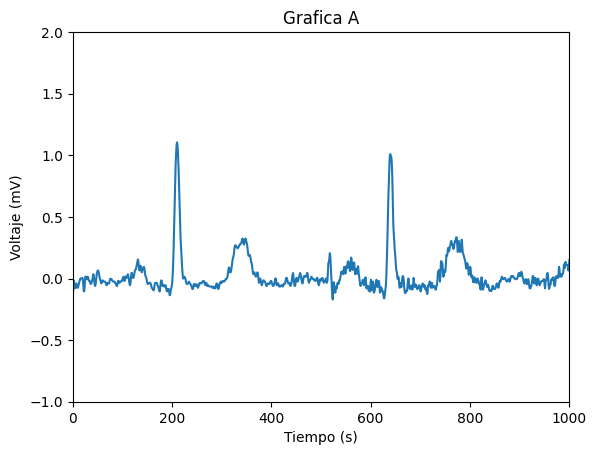

In [3]:
signals,fields=wfdb.rdsamp('/content/43541326')
signals
dedo=signals[:,1]
plt.plot(dedo)
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")
plt.title("Grafica A")
plt.axis([0,1000,-1,2])
plt.show()


In [4]:
suma=0
for n in dedo:
  suma= suma+n
contador=0
for c in dedo:
  contador= contador+1
media=suma/contador
print(f"La media es:{media}")

suma2 = 0
contador2 = 0
for num in dedo:
    suma2= suma2+(num-media) ** 2
for c in dedo:
  contador2= contador2+1

varianza =suma2 / (contador2)
desviacion_p=(varianza)**(1/2)
print(f"La Desviacion estandar de la población es: {desviacion_p}")

suma3 = 0
contador3 = 0
for numer in dedo:
    suma3= suma3+(numer-media) ** 2
for c in dedo:
  contador3= contador3+1

varianza =suma3 / (contador3-1)
desviacion_m= (varianza)**(1/2)
print(f"La Desviacion estandar de la muestra es: {desviacion_m}")

c_variacion=(desviacion_p/media)*100
print(f"El coeficiente de variación es: {c_variacion} %")



La media es:0.04070400000000012
La Desviacion estandar de la población es: 0.1607941988505795
La Desviacion estandar de la muestra es: 0.1608102806827796
El coeficiente de variación es: 395.03291777363165 %


In [5]:
media=np.mean(dedo)
mediana=np.median(dedo)
desviacion_poblacion=np.std(dedo)
desviacion_muestra=np.std(dedo,ddof=1)
curtosis=kurtosis(dedo)
coefvar=(desviacion_poblacion/media)*100




print(f"media igual a {media}")
print(f"mediana igual a {mediana}")
print(f"la desviacion estandar de la poblacion es igual a {desviacion_poblacion}")
print(f"la desviacion estandar de la muestra es igual a {desviacion_muestra}")
print(f"la curtosis es igual a {curtosis}")
print(f"el coeficiente de variacion es igual a {coefvar} %")

media igual a 0.040704000000000004
mediana igual a 0.0
la desviacion estandar de la poblacion es igual a 0.16079419885058044
la desviacion estandar de la muestra es igual a 0.16081028068278053
la curtosis es igual a 14.97171146732827
el coeficiente de variacion es igual a 395.0329177736351 %


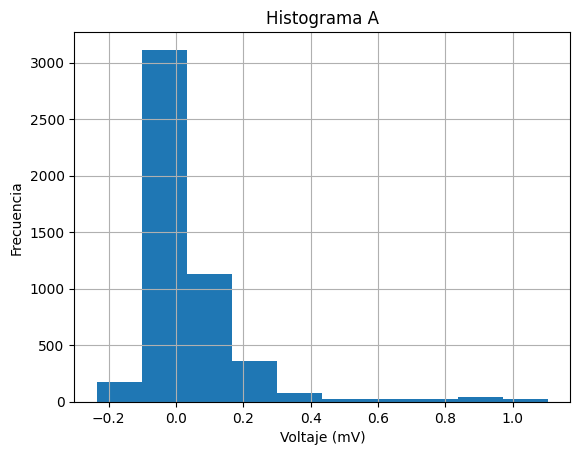

In [6]:
plt.hist(dedo)
plt.grid()
plt.xlabel("Voltaje (mV)")
plt.ylabel("Frecuencia")
plt.title("Histograma A")
plt.show()

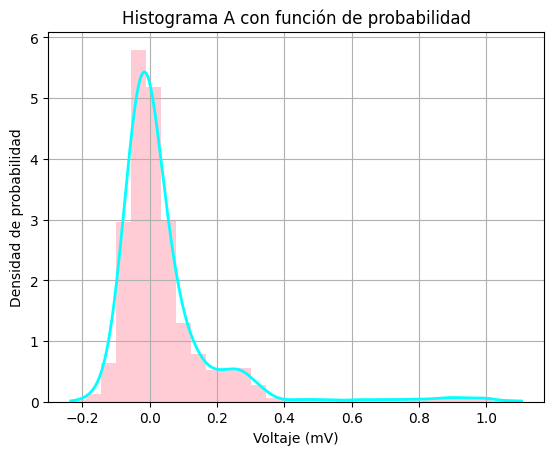

In [7]:
plt.hist(dedo, bins=30, density=True, alpha=0.8, color='pink')

kde = gaussian_kde(dedo)
x_vals = np.linspace(min(dedo), max(dedo), 1000)
plt.plot(x_vals, kde(x_vals), color='cyan', linewidth=2)

plt.grid()
plt.xlabel("Voltaje (mV)")
plt.ylabel("Densidad de probabilidad")
plt.title("Histograma A con función de probabilidad")
plt.show()

klhkjhk